## Diamond Price Prediction

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns

Load dataset

In [60]:
df=pd.read_csv('diamonds.csv')

**Analysis the dataset:**

In [61]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [62]:
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [64]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Check null value in dataframe:

In [65]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

Drop Unnamed column because it does not play any significant role in model training

In [66]:
df = df.drop(['Unnamed: 0'], axis=1)

Rename the column to understand the role of feature in the dataset

In [67]:
df = df.rename(columns = {"depth":"total depth %","x":"length", "y":"width", "z":"depth"})

In [68]:
df.head()

,carat,cut,color,clarity,total depth %,table,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Analyse the data via data visualization:

In [69]:
def hisplot(features):
  sns.histplot(features, kde=False)
  plt.show()

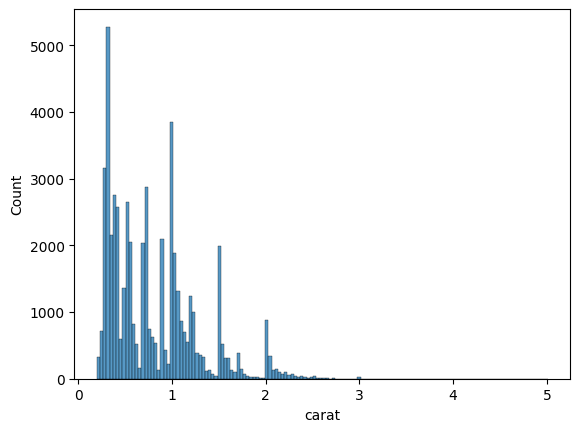

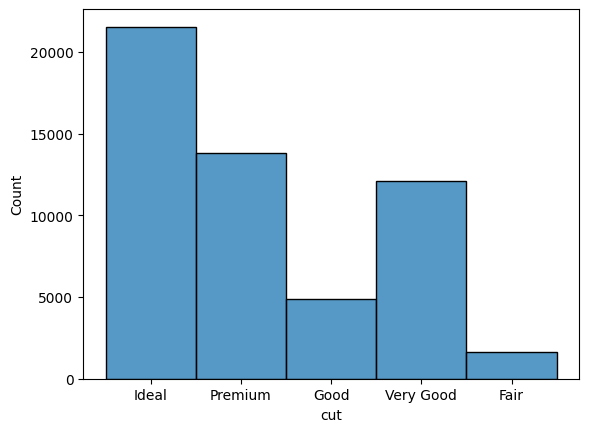

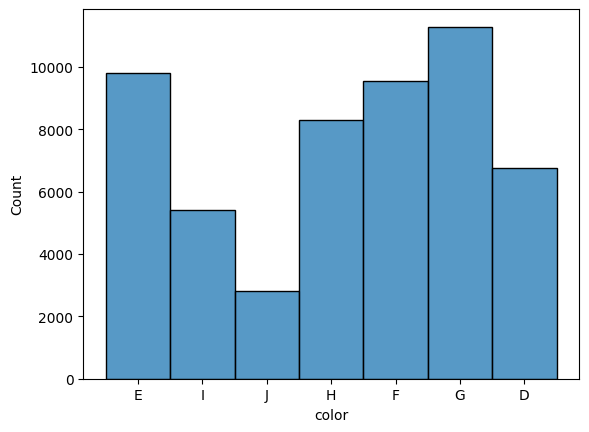

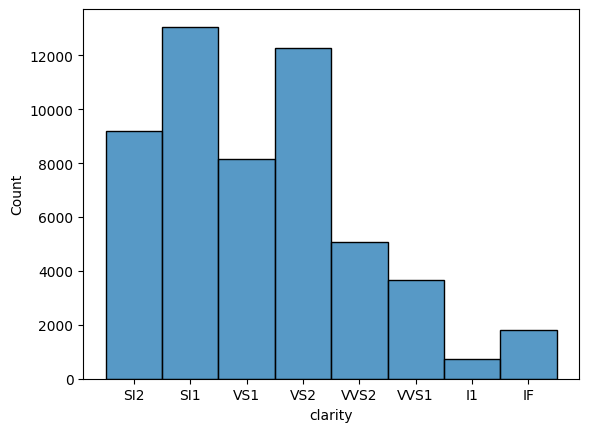

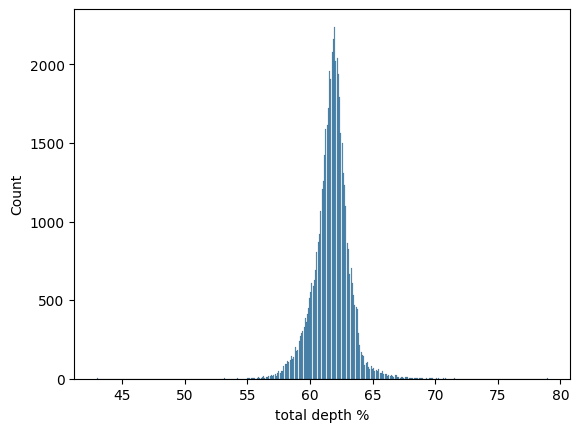

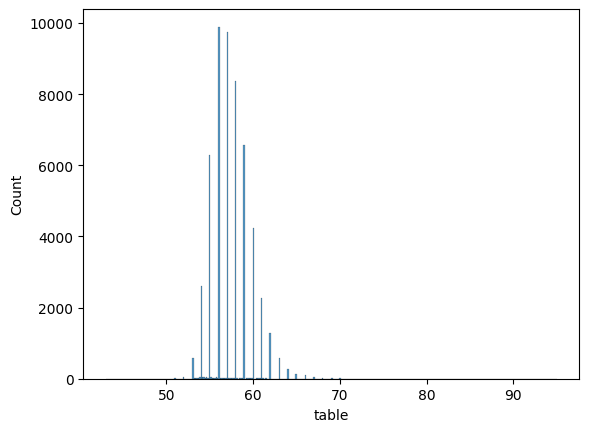

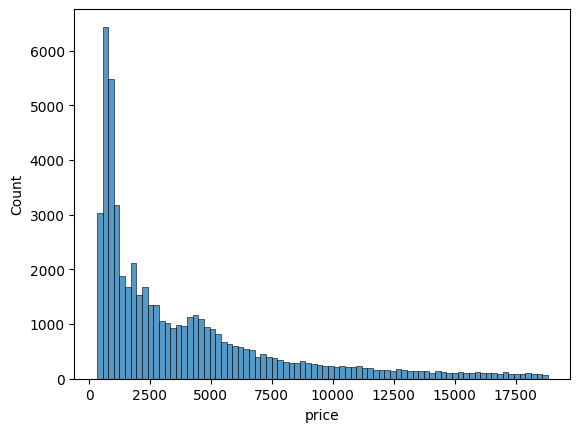

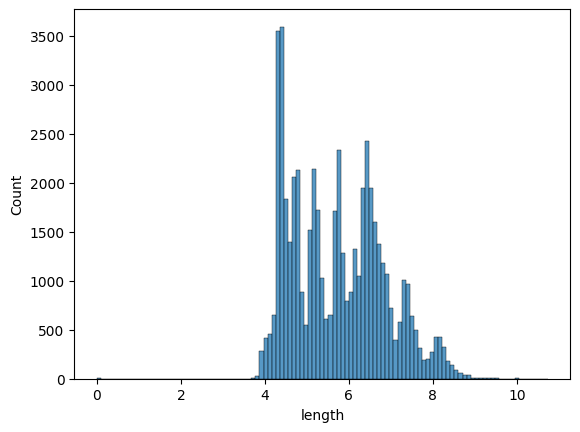

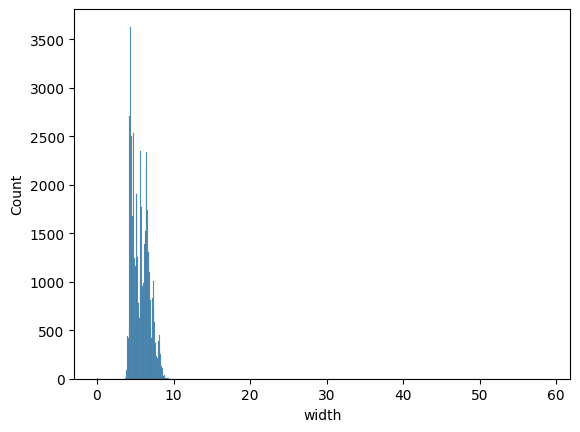

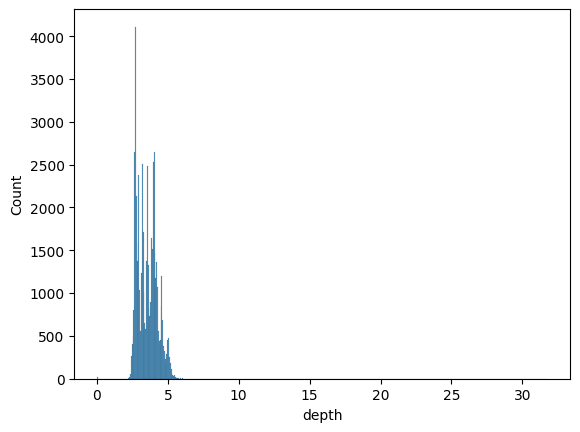

In [70]:
for column in df.columns:
  hisplot(df[column])

Check out the categorical feature

In [71]:
df['clarity'].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [72]:
df['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [73]:
df['color'].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [74]:
df['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

Converting catagorical value to dummy variable otherwise the machine learning algorithm will not take categorical values as input:

**One Hot Encoding**


The one hot encoding is perfomed on feature clarity and color to convert the categories in numeric form:

In [75]:
clarity = pd.get_dummies(df['clarity'], drop_first = True)#drop a column to multicollinearity
color = pd.get_dummies(df['color'], drop_first = True)

**Ordinal Encoding:**

The cut column contains ordinal values therefore ordinal encoding is best fit for this feature:

In [76]:
from sklearn.preprocessing import OrdinalEncoder

ord_e = OrdinalEncoder(categories=[['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']])
df['cut'] = ord_e.fit_transform(df[['cut']])

In [77]:
df.drop(['clarity', 'color'], axis = 1, inplace=True)

After convert the categorical data to numeric form let's concate these feature with dataframe:

In [78]:
df = pd.concat([df, clarity, color], axis=1)

In [79]:
df.head()

,carat,cut,total depth %,table,price,length,width,depth,IF,SI1,...,VS1,VS2,VVS1,VVS2,E,F,G,H,I,J
0,0.23,0.0,61.5,55.0,326,3.95,3.98,2.43,False,False,...,False,False,False,False,True,False,False,False,False,False
1,0.21,1.0,59.8,61.0,326,3.89,3.84,2.31,False,True,...,False,False,False,False,True,False,False,False,False,False
2,0.23,3.0,56.9,65.0,327,4.05,4.07,2.31,False,False,...,True,False,False,False,True,False,False,False,False,False
3,0.29,1.0,62.4,58.0,334,4.20,4.23,2.63,False,False,...,False,True,False,False,False,False,False,False,True,False
4,0.31,3.0,63.3,58.0,335,4.34,4.35,2.75,False,False,...,False,False,False,False,False,False,False,False,False,True


Correlation between the features

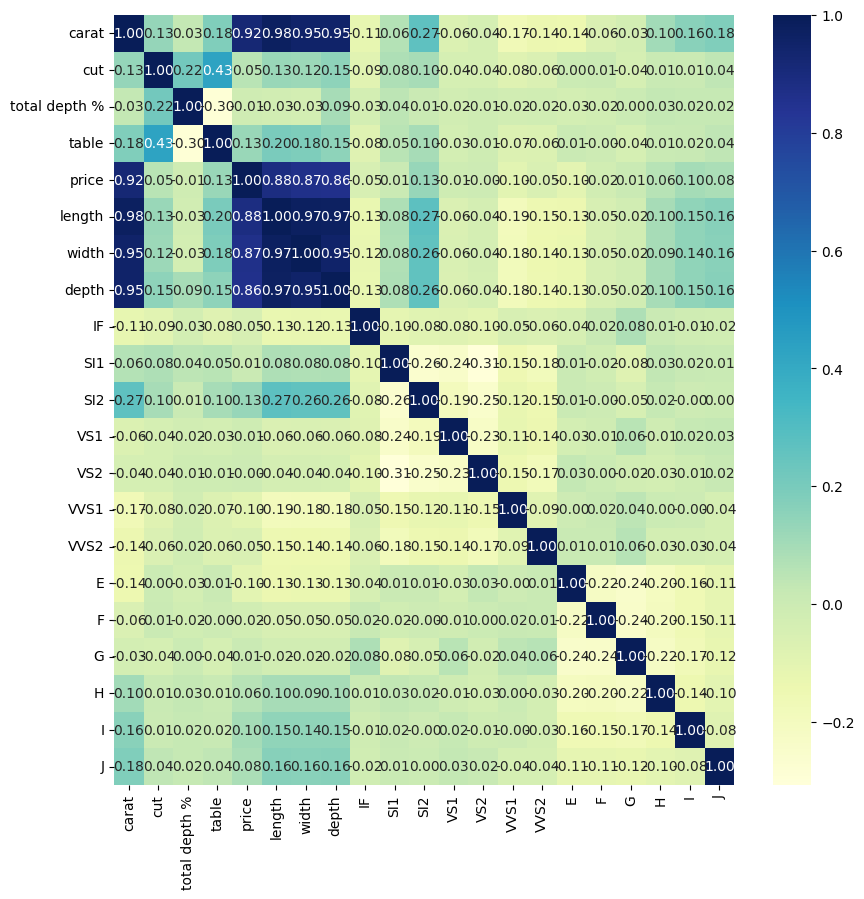

In [80]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, fmt=".2f")
plt.show()

Drop duplicate rows

In [81]:
df.drop_duplicates(inplace=True)

Split dependent and independant features:

In [82]:
x = df.drop('price', axis=1)

y = df['price']

**Normalization:**

In [83]:
from sklearn import preprocessing

preprocess = preprocessing.StandardScaler()

x_transform = preprocess.fit_transform(x)

y_reshape = np.array(y).reshape(-1, 1)
y_transform = preprocess.fit_transform(y_reshape)

Splitting the training and testing data

In [84]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_transform, y_transform, test_size=.20, random_state = 101)

Model Traning and Evaluation

In [85]:
from sklearn.metrics import r2_score, mean_squared_error

**Linear Regression:**

In [101]:
from sklearn.linear_model import LinearRegression

linearReg = LinearRegression()

linearReg.fit(x_train, y_train)

LinearRegression()

In [102]:
# prediction
y_predicted = linearReg.predict(x_test)

# Calculate accuracy:
accuracy = r2_score(y_test, y_predicted)*100

# Mean Squared error:
mse = mean_squared_error(y_test, y_predicted)

# Root mean square:
rmse = np.sqrt(mse)

print("Linear Regression:\n", "--"*30)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("Accurcay: ", accuracy)


Linear Regression:
 ------------------------------------------------------------
Mean Squared Error:  0.076796684707675
Root Mean Squared Error:  0.27712214763110327
Accurcay:  91.98643675028599


RandomForestRegressor

In [103]:
from sklearn.ensemble import RandomForestRegressor
# Define depth of the decision tree in random forest
model_rf = RandomForestRegressor(max_depth=10, random_state=50)
model_rf.fit(x_train, y_train)


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=10, random_state=50)

In [104]:
# prediction
y_predicted = model_rf.predict(x_test)

# Calculate accuracy:
accuracy = r2_score(y_test, y_predicted)*100

# Mean Squared error:
mse = mean_squared_error(y_test, y_predicted)

# Root mean square:
rmse = np.sqrt(mse)

print("RandomForestRegressor:\n", "--"*30)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("Accurcay: ", accuracy)


RandomForestRegressor:
 ------------------------------------------------------------
Mean Squared Error:  0.03682356771514538
Root Mean Squared Error:  0.1918946787046097
Accurcay:  96.15754260631574


 GradientBoostingRegressor

In [105]:
from sklearn.ensemble import GradientBoostingRegressor
model_gb = GradientBoostingRegressor(max_depth=10, random_state=50)
model_gb.fit(x_train, y_train)

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(max_depth=10, random_state=50)

In [106]:
# prediction
y_predicted = model_gb.predict(x_test)

# Calculate accuracy:
accuracy = r2_score(y_test, y_predicted)*100

# Mean Squared error:
mse = mean_squared_error(y_test, y_predicted)

# Root mean square:
rmse = np.sqrt(mse)

print("GradientBoostingRegressor:\n", "--"*30)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("Accurcay: ", accuracy)


GradientBoostingRegressor:
 ------------------------------------------------------------
Mean Squared Error:  0.018381966176143124
Root Mean Squared Error:  0.1355801098101898
Accurcay:  98.08188271189908


DecisionTreeRegressor

In [92]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor(max_depth=10, random_state=50)
model_dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=50)

In [93]:
# prediction
y_predicted = model_dt.predict(x_test)

# Calculate accuracy:
accuracy = r2_score(y_test, y_predicted)*100

# Mean Squared error:
mse = mean_squared_error(y_test, y_predicted)

# Root mean square:
rmse = np.sqrt(mse)

print("DecisionTreeRegressor:\n", "--"*30)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("Accurcay: ", accuracy)


DecisionTreeRegressor:
 ------------------------------------------------------------
Mean Squared Error:  0.04905853119110817
Root Mean Squared Error:  0.22149160523845632
Accurcay:  95.00202970421591


XGBoost Regressor

In [94]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(max_depth=10, random_state=50)
model_xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=50,
             reg_alpha=0, reg_lambda=1, ...)

In [95]:
# prediction
y_predicted = model_xgb.predict(x_test)

# Calculate accuracy:
accuracy = r2_score(y_test, y_predicted)*100

# Mean Squared error:
mse = mean_squared_error(y_test, y_predicted)

# Root mean square:
rmse = np.sqrt(mse)

print("XGBRegressor:\n", "--"*30)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("Accurcay: ", accuracy)


XGBRegressor:
 ------------------------------------------------------------
Mean Squared Error:  0.022084228434838243
Root Mean Squared Error:  0.14860763249186848
Accurcay:  97.7501096130934


LightGBM

In [107]:
import lightgbm as lgb

model_lgb = lgb.LGBMRegressor(max_depth=10, random_state=50)
model_lgb.fit(x_train, y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004870 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1308
[LightGBM] [Info] Number of data points in the train set: 43035, number of used features: 20
[LightGBM] [Info] Start training from score 0.002963
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMRegressor(max_depth=10, random_state=50)

In [108]:
# prediction
y_predicted = model_lgb.predict(x_test)

# Calculate accuracy:
accuracy = r2_score(y_test, y_predicted)*100

# Mean Squared error:
mse = mean_squared_error(y_test, y_predicted)

# Root mean square:
rmse = np.sqrt(mse)

print("lightgbm:\n", "--"*30)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("Accurcay: ", accuracy)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
lightgbm:
 ------------------------------------------------------------
Mean Squared Error:  0.018420722103622385
Root Mean Squared Error:  0.13572296085637972
Accurcay:  98.07783861706167


Keras Deep Learning Model

In [98]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_transform, y_transform, test_size=0.2, random_state=42)

# Define a simple Keras regression model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)  # Single output for regression
])

# Compile the model with mean squared error loss and an appropriate optimizer
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(x_train, y_train, epochs=50, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(x_test, y_test)
print('Test loss:', loss)


Epoch 1/50
1076/1076 [==============================] - 3s 2ms/step - loss: 0.0674 - val_loss: 0.0414
Epoch 2/50
1076/1076 [==============================] - 2s 2ms/step - loss: 0.0351 - val_loss: 0.0426
Epoch 3/50
1076/1076 [==============================] - 3s 3ms/step - loss: 0.0347 - val_loss: 0.0306
Epoch 4/50
1076/1076 [==============================] - 3s 3ms/step - loss: 0.0273 - val_loss: 0.0276
Epoch 5/50
1076/1076 [==============================] - 3s 3ms/step - loss: 0.0249 - val_loss: 0.0288
Epoch 6/50
1076/1076 [==============================] - 3s 3ms/step - loss: 0.0255 - val_loss: 0.0271
Epoch 7/50
1076/1076 [==============================] - 3s 2ms/step - loss: 0.0242 - val_loss: 0.0257
Epoch 8/50
1076/1076 [==============================] - 3s 2ms/step - loss: 0.0232 - val_loss: 0.0258
Epoch 9/50
1076/1076 [==============================] - 2s 2ms/step - loss: 0.0227 - val_loss: 0.0263
Epoch 10/50
1076/1076 [==============================] - 2s 2ms/step - loss: 0.022